# Learn an XOR Neural Network using gradient-based optimization

## Steps

1. Setting the scene
2. Model 1: linear, one layer, no activation function 
3. Model 2: almost linear, one layer, sigmoid activation function 
4. Model 3: one hidden layer with linear and one output layer with sigmoid activation 
5. Model 4: one hidden layer with relu and one output layer with sigmoid activation 
6. Comparison with Model 4 learned with Tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams["figure.facecolor"] = "white"

## Setting the scene

All models $m_i$ follow the standard Neural Network architecture: <img src="img/NN.jpg"> The models vary in the number of layers, the numbers of neurons per layer and in the activation function.

During learning, we optimize the mean squared error $MSE$ of the models $m$ for the model parameters $\mathbf w, \mathbf b$: 

$$MSE(\mathbf w,\mathbf b,m,X,Y) =\frac{1}{N}\sum_{i=1}^{N}(y_i - m(\mathbf w, \mathbf  b, x_i))^2$$

In [3]:
np.random.seed(1)

In [4]:
def mse(ws,m,X,Y):
    N = X.shape[0]
    err = 0
    for ii in range(N):
        xi = X[ii,:]
        yi = m(ws,xi)
        err += (Y[ii] - yi)**2
    err = err / N
    return err

In other words, we find $\arg\min_{\mathbf w, \mathbf b} MSE(\mathbf w, \mathbf b,m,X,Y)$.
Since we implement a binary, logic function (two arguments, two values per argument), $N=2^2=4$ and $X,Y$ define the XOR function:

In [5]:
X = np.array(((0,0),
             (0,1),
             (1,0),
             (1,1),
             ))

Y = np.array((0,1,1,0))

## Model 1: linear, one layer, no activation function 

The first model is a (too) simple linear Neural Network model. It consists of one neuron connected to the input $x_1$ and $x_2$ and an identity, i.e., no effective, activation function. The neuron and the whole model $m_1$ implements $m_1(\mathbf w, b, x) = w_1x_1+w_2x_2+b$.

In [6]:
m1 = lambda ws,x : ws[0]*x[0] + ws[1]*x[1] + ws[2]
mse1 = lambda ws : mse(ws,m1,X,Y)

As the Tensorflow default, we implement the Glorot uniform initializer for setting the initial weights $\mathbf w_0$.
It draws samples from a uniform random distribution within $[-\mathit{limit}, \mathit{limit}]$,
where $\mathit{limit} = \sqrt{\frac{6}{\mathit{in} + \mathit{out}}}$, and
where $\mathit{in}$ and $\mathit{out}$ is the number of input and output units, resp. The initial bias $b_0$ is set to $0$.

In [7]:
n_in = 2
n_out = 1
limit = np.sqrt(6 / (n_in + n_out))
ws0 = np.random.uniform(-limit,limit,size = 2)
ws0 = np.hstack((ws0,0))
ws0

array([-0.23469721,  0.62317177,  0.        ])

We are ready to assess $MSE$ for $m_1$ for this initial weights setting.

In [8]:
mse1(ws0)

0.454347300912757

The gradient of $MSE(\mathbf w,b)$ for any $\mathbf w, b$ is defiend as:

$$
\begin{aligned}
\nabla MSE(\mathbf w,b) &= \left [ 
\frac{\partial MSS(\mathbf w,b)}{\partial w_1}, 
\frac{\partial MSS(\mathbf w,b)}{\partial w_2}, 
\frac{\partial MSE(\mathbf w,b)}{\partial b}
\right ]^T\\
&= \frac{1}{4}\left [ 
\frac{\partial \sum_{i=1}^{4}(y_i - m_1(\mathbf w,b,x_i))^2}{\partial w_1}, 
\frac{\partial \sum_{i=1}^{4}(y_i - m_1(\mathbf w,b,x_i))^2}{\partial w_2}, 
\frac{\partial \sum_{i=1}^{4}(y_i - m_1(\mathbf w,b,x_i))^2}{\partial b} 
\right ]^T \\
&= \frac{1}{4} \left [ 
\sum_{i=1}^{4}2(y_i- m_1(\mathbf w,b,x_i))\frac{-\partial m_1(\mathbf w,b,x_i)}{\partial w_1},
\sum_{i=1}^{4}2(y_i- m_1(\mathbf w,b,x_i))\frac{-\partial m_1(\mathbf w,b,x_i)}{\partial w_2},
\sum_{i=1}^{4}2(y_i- m_1(\mathbf w,b,x_i))\frac{-\partial m_1(\mathbf w,b,x_i)}{\partial b}
\right ]^T \\
&= -\frac{1}{2} \left [ 
\sum_{i=1}^{4}(y_i- m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_1},
\sum_{i=1}^{4}(y_i- m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_2},
\sum_{i=1}^{4}(y_i- m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b}
\right ]^T \\
\end{aligned}
$$

We can plug in the function $m_1$ and the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$ resp.

$$
\begin{aligned}
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_j} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial w_j} = x_{ij}\\
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial b} = 1\\
\end{aligned}
$$

We have already defined the function $m_1$. Let's also define the functions of the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$ resp. For the sake of generality, we keep the parameters $\mathbf w, b$ that are actually not needed for  derivatives of this concrete model $m_1$. 

In [9]:
gradients1 = [lambda ws,x: x[0],
              lambda ws,x: x[1],
              lambda ws,x: 1,
             ]

The gradient of $MSE$ can now be defined using $m_1$ and the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp., as parameters.

In [10]:
def grad_mse(ws,m,grads,X,Y):
    N = X.shape[0]
    M = ws.shape[0]
    grad_ws = np.zeros(M)
    for i in range(N):
        xi = X[i,:]
        yi = Y[i]
        tmp = yi - m(ws,xi)
        for j in range(M):
            grad_ws[j] += tmp*grads[j](ws,xi)
    grad_ws = -2 * grad_ws / N
    return grad_ws

Finally, we are ready to define the gradient descent function optimizing $\mathbf w, b$ by iterating over:

$$(\mathbf w_{k+1}, b_{k+1}) = (\mathbf w_k, b_k) - \varepsilon \nabla MSE(\mathbf w_k,b_k)$$

staring with $(\mathbf w_0, b_0)$.

In [11]:
def grad_desc_mse(K,ws,learning_eps,loss,grad_loss,verbose):
    history = np.zeros(K+1)
    history[0] = loss(ws)
    for k in range(K):
        grad_ws = grad_loss(ws)
        old_ws = ws
        ws = old_ws - learning_eps * grad_ws
        if verbose:
            plt.plot((old_ws[0],ws[0]),(old_ws[1],ws[1]))
        history[k+1] = loss(ws)
    return ws,history

[5.63467723e-05 5.68326021e-05 4.99932877e-01]


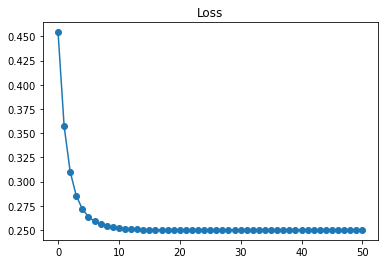

In [12]:
grad_loss = lambda ws: grad_mse(ws,m1,gradients1,X,Y)
K = 50
learning_eps = 0.5
ws,history = grad_desc_mse(K,ws0,learning_eps,mse1,grad_loss,False)
print(ws)
plt.plot(history,"o-")
plt.title("Loss")

plt.show()

In [13]:
my_xor1 = lambda x1,x2: int(np.round(ws[0]*x1 + ws[1]*x2 + ws[2]))
for i in range(X.shape[0]):
    print("my_xor1({:d},{:d})={:d}".format(X[i,0],X[i,1],my_xor1(X[i,0],X[i,1])))

my_xor1(0,0)=0
my_xor1(0,1)=0
my_xor1(1,0)=0
my_xor1(1,1)=1


In [14]:
def accuracy(X,Y,f):
    correct = 0
    for i in range(X.shape[0]):
        y = f(X[i,0],X[i,1])
        if y == Y[i]:
            correct +=1
        else:
            print("f({:d},{:d})={:d}, but should be {:d}".format(X[i,0],X[i,1],y,Y[i]))
    a = correct / X.shape[0]
    return a

In [15]:
a = accuracy(X,Y,my_xor1)
print("Accuracy: {}".format(a))

f(0,1)=0, but should be 1
f(1,0)=0, but should be 1
f(1,1)=1, but should be 0
Accuracy: 0.25


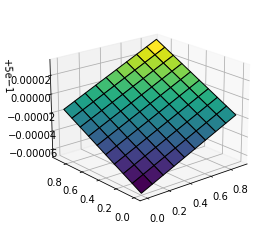

In [16]:
f = lambda x1,x2 : ws[0]*x1 + ws[1]*x2 + ws[2]
A,B = np.meshgrid(np.arange(0,1,0.1),np.arange(0,1,0.1))
ax = plt.axes(projection='3d')
Z = f(A,B)
ax.plot_surface(A, B, Z,
                rstride=1,
                cstride=1,
                cmap='viridis',
                edgecolor='black')

ax.view_init(20, 230)
plt.show()

## Model 2: linear, one layer, sigmoid activation function 

The second model is still a (too) simple Neural Network model. As model $m_1$, it consists of one neuron connected to the input $x_1$ and $x_2$ but it uses a sigmoid activation function $s(x)=\frac{1}{1+e^{-x}}$. 
The cell body still implements $m_1(\mathbf w, b, x) = w_1x_1+w_2x_2+b$, the whole model $m_2$ implements:

$$m_2(\mathbf w, b, x)=\frac{1}{1+e^{-m_1(\mathbf w, b, x)}}$$

Note that we just plug in $m_1$ into $m_2$ and $m_2$ into the loss function $MSE$ to obtain the new composite model and loss functions.

In [17]:
s = lambda x: 1.0 / (1.0 + np.exp(-x))
m2 = lambda ws,x : s(m1(ws,x))
mse2 = lambda ws : mse(ws,m2,X,Y)

As we use the same initialization, we can assess $MSE$ for $m_2$ and this initial weights setting.

In [18]:
mse2(ws0)

0.25969403494826393

For model the $m_2$, gradient of $MSE(\mathbf w,b)$ for any $\mathbf w, b$ is almost identical as before. We just plug in $m_2$ instead of $m_1$ and $m_2'$ instead of $m_1'$:

$$
\begin{aligned}
\nabla MSE(\vec w,b) &= -\frac{1}{2} \left [ 
\sum_{i=1}^{4}(y_i- m_2(\mathbf w,b,x_i))\frac{\partial m_2(\mathbf w,b,x_i)}{\partial w_1},
\sum_{i=1}^{4}(y_i- m_2(\mathbf w,b,x_i))\frac{\partial m_2(\mathbf w,b,x_i)}{\partial w_2},
\sum_{i=1}^{4}(y_i- m_2(\mathbf w,b,x_i))\frac{\partial m_2(\mathbf w,b,x_i)}{\partial b}
\right ]^T \\
\end{aligned}
$$

Let $s(x)=\frac{1}{1+e^{-x}}$. Then $\frac{\partial s(x)}{\partial x} = s(x)s(-x)$. 

$$
\begin{aligned}
\frac{\partial m_2(\mathbf w,b,x_i)}{\partial \mathbf w, b} 
&=\frac{\partial s(m_1(\mathbf w,b,x_i))}{\partial \mathbf w, b} \\
&=s(m_1(\mathbf w,b,x_i))s(-m_1(\mathbf w,b,x_i))\frac{\partial m_1(\mathbf w,b,x_i)}{\partial \mathbf w, b} \\
\end{aligned}
$$

We can plug in the function $m_1$ and the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp., as computed before.

$$
\begin{aligned}
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_j} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial w_j} = x_{ij}\\
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial b} = 1\\
\end{aligned}
$$

We have already defined the function $m_1$, the functions of the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp, and the sigmoid activation function $f$. The gradient calculation depends of these functions and the gradient descent method does not change either. We just need to pulg together the new neural network:

In [19]:
gradients2 = [lambda ws,x: s(m1(ws,x))*(s(-m1(ws,x)))*gradients1[0](ws,x),
              lambda ws,x: s(m1(ws,x))*(s(-m1(ws,x)))*gradients1[1](ws,x),
              lambda ws,x: s(m1(ws,x))*(s(-m1(ws,x)))*gradients1[2](ws,x),
             ]

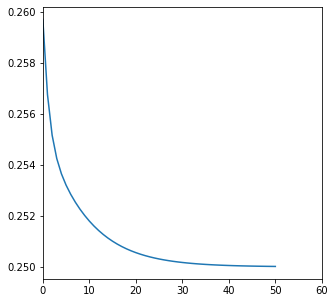

In [20]:
grad_loss = lambda ws : grad_mse(ws,m2,gradients2,X,Y)
K = 50
learning_eps = 2
ws,history = grad_desc_mse(K,ws0,learning_eps,mse2,grad_loss,False)
plt.figure(figsize=(5,5))
plt.xlim([0,60])
plt.plot(history)
plt.show()

In [21]:
my_xor2 = lambda x1,x2 : int(round(s(ws[0]*x1 + ws[1]*x2 + ws[2])))
for i in range(X.shape[0]):
    print("my_xor2({:d},{:d})={:d}".format(X[i,0],X[i,1],my_xor2(X[i,0],X[i,1])))
    
a = accuracy(X,Y,my_xor2)

my_xor2(0,0)=0
my_xor2(0,1)=1
my_xor2(1,0)=0
my_xor2(1,1)=1
f(1,0)=0, but should be 1
f(1,1)=1, but should be 0


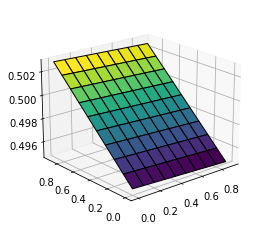

In [22]:
f = lambda x1,x2: s(ws[0]*x1 + ws[1]*x2 + ws[2])
A,B = np.meshgrid(np.arange(0,1,0.1),np.arange(0,1,0.1))
Z = f(A,B)
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, Z,
                rstride=1,
                cstride=1,
                cmap='viridis',
                edgecolor='black')

ax.view_init(20, 230)
plt.show()

Not much changes as the co-domain of $m_1$ is just in the domain of the sigmoid activation function $s$ where it is almost linear.

## Model 3: one hidden layer with linear and one output layer with sigmoid activation

The third model adds a hidden layer of 32 neurons with linear activation function. Each of these neurons uses the three parameters $w_1, w_2, b$. As before, all parameters are captured in the parameter array `ws`. The parameters for each neuron are at different positions in this array. Let's define the model $m_3$ with hidden and output layers and the corresponding loss function $MSE$.

In [23]:
np.random.seed(5)

In [24]:
def hidden_layers(ws,x,n):
    y = np.zeros(n)
    for i in range(n):
        i1 = i*3
        i2 = i*3+1
        i3 = i*3+2
        y[i] = ws[i1]*x[0] + ws[i2]*x[1] + ws[i3]
    return y

In [25]:
n = 32
mo = lambda ws,x : np.dot(hidden_layers(ws,x,n),ws[n*3:4*n]+ws[4*n])
m3 = lambda ws,x : s(mo(ws,x))
mse3 = lambda ws: mse(ws,m3,X,Y)

We initialize the weight vector:

In [26]:
ws0 = np.zeros(4*n+1)
n_in = 2
n_out = 1
limit = np.sqrt(6 / (n_in + n_out))
init = lambda : np.random.uniform(-limit,limit)
for i in range(n):
    i1 = i*3 
    i2 = i*3 + 1
    i3 = i*3 + 2
    ws0[i1] = init()
    ws0[i2] = init()
    ws0[i3] = 0
    
n_in = n
n_out = 1
limit = np.sqrt(6 / (n_in + n_out))
init = lambda : np.random.uniform(-limit,limit)
for i in range(n*3,4*n):
    ws0[i] = init()
    
ws0[4*n] = 0

We are ready to compute the initial loss:

In [27]:
mse3(ws0)

0.28450461018459194

Even for model the $m_3$ the gradient of $MSE({\mathbf{ws}}_o,{\mathbf{ws}}_h)$ for any weight ${\mathbf{ws}}_o,{\mathbf{ws}}_h$ of the output and hidden layers, resp., is almost identical as before. We just plug in $m_3$ instead of $m_2$ and $m_3'$ instead of $m_2'$:

$$
\begin{aligned}
\nabla MSE({\mathbf{ws}}_o,{\mathbf{ws}}_h) &= -\frac{1}{2} \left [ 
\sum_{i=1}^{4}(y_i- m_3({\mathbf{ws}}_o,{\mathbf{ws}}_h)\frac{\partial m_3({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial {\mathbf{ws}}_o,{\mathbf{ws}}_h}\right ]^T \\
\frac{\partial m_3({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)} 
&=\frac{\partial s(m_o(\vec{\mathit{ws}}_o,\vec{\mathit{ws}}_h,x_i))}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)} \\
&=s(m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i))s(-m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i))\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)} \\
\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)}
&=\frac{\partial \sum_{k=1}^{n} (m_1({\mathbf{ws}}_{h,3(k-1)+1:2},{\mathbf{ws}}_{h,3(k-1)+3},x_i){\mathbf{ws}}_{o,k}) + {\mathbf{ws}}_{o,n+1}}{\partial ({\mathbf{ws}}_o,{\mathbf{ws}}_h)}
\end{aligned}
$$

The term ${\mathbf{ws}}_{o,3n+k}$  selects the weights of the output layer and the term ${\mathbf{ws}}_{o, 3n+n+1}$ selects the bias $b$ from the vector ${\mathbf{ws}_o}$. 
The term ${\mathbf{ws}}_{h,3(k-1)+1:2}$ selects the two weights $\mathbf w_k$ of the $k$-th neuron in the hidden layer,  and the term ${\mathbf{ws}}_{h,3(k-1)+3}$ selects the $k$-th bias $\mathbf b_k$ from the vector ${\mathbf{ws}_h}$. 

The gradients wrt. the parameters of the hidden layer are

$$
\begin{aligned}
\frac{\partial m_o(\mathbf{ws}_o,\mathbf{ws}_h,x_i)}{\partial {\mathbf{ws}}_{h,3(k-1)+j}}
&=
\begin{cases}
  \frac{\partial m_1(\mathbf{w}_k,b_k,x_i)}{\partial \mathbf{w}_{k,j}}\mathbf{ws}_{o,k}, & \text{if}\ j=1,2 \\
  \frac{\partial m_1(\mathbf{w}_k,b_k,x_i)}{\partial b_k}\mathbf{ws}_{o,k}, & \text{if}\ j=3 
\end{cases}
\end{aligned}
$$

Since the cell function of the hidden layer is $m_1$, we can plug in the first derivative of $m_1$ wrt. $w_1, w_2,$ and $b$, resp., as computed before.

$$
\begin{aligned}
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial w_j} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial w_j} = x_{ij}\\
\frac{\partial m_1(\mathbf w,b,x_i)}{\partial b} &=\frac{\partial(\sum_{j=1}^{2} w_jx_{ij})+b}{\partial b} = 1\\
\end{aligned}
$$

The gradients wrt. the weights and the bias, resp., of the output layer are

$$
\begin{aligned}
\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial {\mathbf{ws}}_{o,k}}
&= m_1(\vec{w_k},b_k,x_i)\\
\frac{\partial m_o({\mathbf{ws}}_o,{\mathbf{ws}}_h,x_i)}{\partial {\mathbf{ws}}_{o,n+1}}
&= 1
\end{aligned}
$$

In [28]:
def grad_mse(ws,m,grads,X,Y):
    N = X.shape[0]
    M = ws.shape[0]
    grad_ws = np.zeros(M)
    for i in range(N):
        xi = X[i,:]
        yi = Y[i]
        tmp = yi - m(ws,xi)
        for j in range(M):
            grad_ws[j] += tmp*grads[j](ws,xi)
    grad_ws = -2 * grad_ws / N
    return grad_ws

**Comment 1**: I've abstained from using anonymous functions since they bind variables in run-time, and hence are not suitable to construct in for loops (where the iterator variable changes). Hence why the nested functions below are used.
<br><br>
**Comment 2** : In the old `github` code the expression $\frac{ds}{dx} = s(x)s(-x)$ is used, while in the updated version it's given as: $\frac{ds}{dx} = s(x)s(1-x)$, which I believe is a typo, where it should have been $(1-s(x))$, see [LINK1](https://www.wolframalpha.com/input/?i=%281-sigmoid%28x%29%29+%3D+sigmoid%28-x%29) and [LINK2](https://www.wolframalpha.com/input/?i=%281-sigmoid%28x%29%29+%3D+sigmoid%28-x%29). I've used the expression  $\frac{ds}{dx} = s(x)s(-x) = s(x)(1-s(x))$ in my code. 

In [29]:
def g1(k):
    def fun(ws,x):
        return s(mo(ws,x))*(s(-mo(ws,x)))*x[0]*ws[3*n+k]
    return fun

def g2(k):
    def fun(ws,x):
        return s(mo(ws,x))*(s(-mo(ws,x)))*x[1]*ws[3*n+k]
    return fun

def g3(k):
    def fun(ws,x):
        return s(mo(ws,x))*(s(-mo(ws,x)))*ws[3*n+k]
    return fun

def m1(i1,i2,i3):
    def fun(ws,x):
        return ws[i1]*x[0] + ws[i2]*x[1]+ws[i3]
    return fun

def g0_0(j):
    def fun(ws,x):
        return s(mo(ws,x))*(s(-mo(ws,x)))*model1[j](ws,x)
    return fun

In [30]:

gradients3 = [None] * (4*n+1)
model1 = [None] * n
for k in range(n):
    i1 = 3*k
    i2 = 3*k + 1
    i3 = 3*k + 2
    gradients3[i1] = g1(k)
    gradients3[i2] = g2(k)
    gradients3[i3] = g3(k)
    model1[k] = m1(i1,i2,i3)
    
for j,i in enumerate(range(3*n,4*n)):
    gradients3[i] = g0_0(j)

gradients3[4*n] = lambda ws,x: s(mo(ws,x))*(s(-mo(ws,x)))

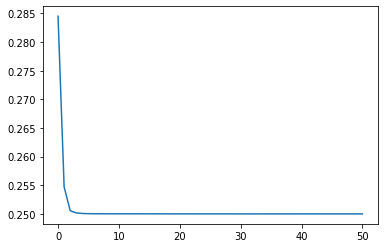

In [31]:
grad_loss = lambda ws: grad_mse(ws,m3,gradients3,X,Y)
K = 50
learning_eps = 0.5
ws,history = grad_desc_mse(K,
                           ws0,
                           learning_eps,
                           mse3,
                           grad_loss,
                           False)
plt.plot(history)
plt.show()

In [32]:
def plotfun(A,B,mf):
    shape = A.shape
    af = A.flatten()
    bf = B.flatten()
    abf = np.hstack((af[:,np.newaxis],bf[:,np.newaxis]))
    z = np.zeros(abf.shape[0])
    for i in range(abf.shape[0]):
        z[i] = mf(ws,abf[i])
    Z = z.reshape(shape)
    return Z

my_xor3(0,0)=1
my_xor3(0,1)=1
my_xor3(1,0)=1
my_xor3(1,1)=0
f(0,0)=1, but should be 0
Accuracy : 0.75


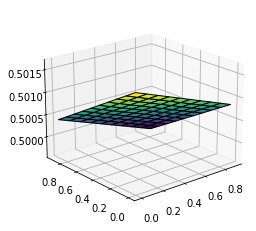

In [33]:
my_xor3 = lambda x1,x2 : int(round(m3(ws,[x1,x2])))
for i in range(4):
    print("my_xor3({:d},{:d})={:d}".format(X[i,0],X[i,1],my_xor3(X[i,0],X[i,1])))
a = accuracy(X,Y,my_xor3)
print("Accuracy : {}".format(a))

A,B = np.meshgrid(np.arange(0,1,0.1),np.arange(0,1,0.1))
Z = plotfun(A,B,m3)
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, Z,
                rstride=1,
                cstride=1,
                cmap='viridis',
                edgecolor='black')

ax.view_init(20, 230)
plt.show()

## Model 4: one hidden layer with relu and one output layer with sigmoid activation 

The final model uses the Rectified Linear Unit (ReLU) activation function $r(x)=\max(0,x)$ in the hidden layer. Hence the hdden layer neurons compute $\max(0, w_1x_1+w_2x_2+b)=\max(0,m_1(\vec w,b,x))$. We can easily change the hidden layer function accordingly.

In [34]:
def ReLU(x):
    x_pos = x > 0
    x_new = np.zeros(x.shape)
    x_new[x_pos] = x[x_pos]
    return x_new

In [35]:
hidden_layer_4 = lambda ws,x,n: ReLU(hidden_layers(ws,x,n))
mo4 = lambda ws,x : np.dot(hidden_layer_4(ws,x,n),ws[3*n:4*n] + ws[4*n])
m4 = lambda ws,x : s(mo4(ws,x))
mse4 = lambda ws: mse(ws,m4,X,Y)

The network structure does not change, hence, the initialization remains the same as well. We can directly compute the initial loss:

In [36]:
mse4(ws0)

0.2642973268772289

No surprise it is the same as for model $m_3$ as all weights and all input is positive.
<br><br>
**Comment 2** : I'm not sure if I agree, but perhaps this is due to a misconception from my side. Aren't we initializing the `ws0` object using the _Glorot Uniform_ strategy, which samples weights according to : $w \sim \mathcal{U}(-\textrm{limit},\textrm{limit})$,  hence it seems like all the weights are not necessarily positive. Looking at the value of `mse3(ws0)` they do not fully agree with `mse4(ws0)`. Happy to be corrected, or enlightened about where my reasoning is wrong.

As for the model $m_4$ itself, we need to subsitute $m_1(\mathbf w,b,x)$ with $r(\mathbf w,b,x)=\max(0,m_1(\mathbf w,b,x))$ and $m_1'(\mathbf w,b,x)$ with $r'(m_1(\mathbf w,b,x))m_1'(\mathbf w,b,x)$.

$$r'(z) = \begin{cases}
  0, & \text{if}\ z<0 \\
  1, & \text{if}\ z>0 
\end{cases}
$$

Note that $r'(z)$ is undefined in $z=0$, since its left and right derivative are not equal for $z=0$. In practice , we pick $r'(0)=0$ as Tensorflow does. Consequently: 

$$r'(m_1(\mathbf w,b,x))m_1'(\mathbf w,b,x) = \begin{cases}
  0, & \text{if}\ m_1(\mathbf w,b,x)\leq 0 \\
  m_1'(\mathbf w,b,x), & \text{if}\ m_1(\mathbf w,b,x)>0 
\end{cases}
$$


In [37]:
def ite(cond,tc,fc):
    if cond:
        res = tc
    else:
        res = fc
    return res

**Comment 1** : The below functions are used for the same reason as mentioned for Part 3.
<br><br>
**Comment 2** : In the instructions `model1`, was defined as `model1{k} = @(ws,x)(max(0,ws(i1)*x(1)+ws(i2)*x(2)+ws(i3)))`, which makes no sense to me as this condition is later used in the `ite` function, to be checked whether it is less than zero or not; but applying the ReLU function would obviously always have it larger than or equal to zero. I assume that this is a typo as well. Hence I've defined `model1` as the expression previously used throughout the code, and for the output layer applied the `ReLU` function in concordance with line 14 of the instructions. 

In [38]:
def g4_1(i1,i2,i3,k):
    def fun(ws,x):
        cond = ws[i1]*x[0] + ws[i2]*x[1] + ws[i3] <= 0.0
        return s(mo4(ws,x))*s(-mo4(ws,x))*\
                ite(cond,0,x[0])*ws[3*n+k] 
    return fun

def g4_2(i1,i2,i3,k):
    def fun(ws,x):
        cond = ws[i1]*x[0] + ws[i2]*x[1] + ws[i3] <= 0.0
        return s(mo4(ws,x))*s(-mo4(ws,x))*\
                ite(cond,0,x[1])*ws[3*n+k] 
    return fun
        
def g4_3(i1,i2,i3,k):
    def fun(ws,x):
        cond = ws[i1]*x[0] + ws[i2]*x[1] + ws[i3] <= 0.0
        return s(mo4(ws,x))*s(-mo4(ws,x))*\
                ite(cond,0,1)*ws[3*n+k] 
    return fun

def g4_model1(i1,i2,i3):
    def fun(ws,x):
        return ws[i1]*x[0] + ws[i2]*x[1] + ws[i3]
    return fun

def g4_out_w(model1,k):
    def fun(ws,x):
        return s(mo4(ws,x)) * s(-mo4(ws,x)) * ReLU(model1[k](ws,x))
    return fun

def g4_out_b():
    def fun(ws,x):
        return s(mo4(ws,x)) * s(-mo4(ws,x))
    return fun

In [39]:
gradients4 = [None] * (4*n+1)
model1 = [None] * n
for k in range(n):
    i1 = 3*k
    i2 = 3*k+1
    i3 = 3*k+2
    model1[k]= g4_model1(i1,i2,i3)
    gradients4[i1] = g4_1(i1,i2,i3,k)
    gradients4[i2] = g4_2(i1,i2,i3,k)
    gradients4[i3] = g4_3(i1,i2,i3,k)

for j,i in enumerate(range(3*n,4*n)):
    gradients4[i] = g4_out_w(model1,j)

gradients4[4*n] = g4_out_b()

**Comment** : I had to use a lower learning rate and larger number of iterations, since higher learning rates seemed to give exploding gradients and was fairly unstable. I'm guessing this is due to something wrong in my implementation, but the solution seems to be very similar (based on the character of the surfaceplot) to the `Tensorflow` solution, so it can't be completely wrong.

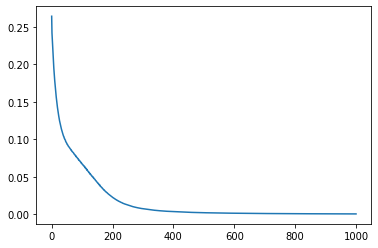

In [40]:
grad_loss = lambda ws: grad_mse(ws,m4,gradients4,X,Y)
K = 1000
learning_eps = 0.5
ws,history = grad_desc_mse(K,ws0,learning_eps,mse4,grad_loss,False)
plt.plot(history)
plt.show()

my_xor4(0,0)=0
my_xor4(0,1)=1
my_xor4(1,0)=1
my_xor4(1,1)=0
Accuracy : 1.0


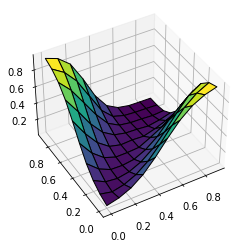

In [41]:
my_xor4 = lambda x1,x2 : int(round(m4(ws,[x1,x2])))
for i in range(4):
    print("my_xor4({:d},{:d})={:d}".format(X[i,0],X[i,1],my_xor4(X[i,0],X[i,1])))
a = accuracy(X,Y,my_xor4)
print("Accuracy : {}".format(a))

A,B = np.meshgrid(np.arange(0,1,0.1),np.arange(0,1,0.1))
Z = plotfun(A,B,m4)
ax = plt.axes(projection='3d')
ax.plot_surface(A, B, Z,
                rstride=1,
                cstride=1,
                cmap='viridis',
                edgecolor='black')

ax.view_init(40, 240)
plt.show()

## Comparison with Model 4 learned with Tensorflow

Weights of the hidden layer (manually copied):

**Comment** : Based on the comments from the previous Assignments, I assume that this is not something I really need to re-implement. As it's meant to be something for us to compare with.

In [136]:
w11 = reshape([ 0.41652033,  0.7749157 ,  0.83778775,  0.64122725,  0.3972386 ,
         -0.13516521, -0.60432655, -0.20290181, -0.7232665 , -0.35317   ,
         -0.8889785 , -0.2863993 ,  0.54030126,  0.37175888, -0.82367843,
         -0.33497408, -0.8567182 ,  0.5161414 , -0.25462216,  0.59564906,
          0.80922335,  0.00252599,  0.3720131 , -0.1701207 ,  0.34805146,
         -0.38333094, -0.17244412,  0.7132528 , -0.14648864, -0.17876345].', 1,[]).';
w11 = [w11; [-0.6636416 ; -0.39717668]];
w12 = reshape([0.41662493, -0.7749062 , -0.8376726 , -0.64101034,  0.40976927,
         -0.09223783,  0.60428804, -0.09886253,  0.7417394 , -0.08979583,
          1.1194593 ,  0.13293397,  0.5400226 ,  0.37171456,  0.8246372 ,
         -0.43565178,  0.85677105,  0.51622313, -0.41895077, -0.5953253 ,
         -0.8091849 , -0.3766787 ,  0.28819063, -0.38122708,  0.34833792,
          0.15245543, -0.25060123, -0.7132655 , -0.30406952, -0.3443008].', 1,[]).';
w12 = [w12; [0.66343206; -0.03848529]];
b1 = reshape([-4.16518986e-01, -4.11640503e-05, -1.45169579e-05, -3.96516771e-06,
        -1.09622735e-04,  0.00000000e+00,  2.90098578e-05,  0.00000000e+00,
        -1.63983065e-03,  0.00000000e+00, -6.36966957e-04, -1.47912502e-01,
        -5.39916575e-01, -3.71752203e-01, -5.50682598e-04,  1.15736163e+00,
        -6.27825721e-05, -5.16140461e-01,  0.00000000e+00, -1.62737619e-04,
        -8.02413124e-05, -2.25486048e-02,  1.79730232e-05,  0.00000000e+00,
        -3.48306417e-01, -1.66664287e-01,  0.00000000e+00, -3.03934885e-05,
         0.00000000e+00,  0.00000000e+00,  6.44910688e-05,  0.00000000e+00].', 1,[]).';
ws1=[w11,w12,b1];
ws1=reshape(ws1.',1,[]).';

Weights of the output layer manually copied:

In [137]:
ws2 = [-0.8178053 ,
1.0259871 ,
0.7672013 ,
0.9983522 ,
0.3300904 ,
0.1318875 ,
0.9221373 ,
0.20387506,
1.0057546 ,
0.2067241 ,
0.7479725 ,
-0.25578788,
-0.83140665,
-0.952559  ,
0.946334  ,
-1.0112743 ,
0.5946371 ,
-1.0230583 ,
-0.04098088,
0.9588608 ,
0.7448052 ,
-0.10435582,
0.25728533,
0.30141222,
-0.8235109 ,
-0.21171094,
-0.28320622,
1.0405817 ,
0.40911728,
0.37331975,
0.87603277,
0.19098908,
-0.8885394];
ws = [ws1;ws2];

Replace the learned weights of model $m_4$ with the copied weights and assess the function:

my_xor5(0,0)=0
my_xor5(0,1)=1
my_xor5(1,0)=1
my_xor5(1,1)=0

a =

     1




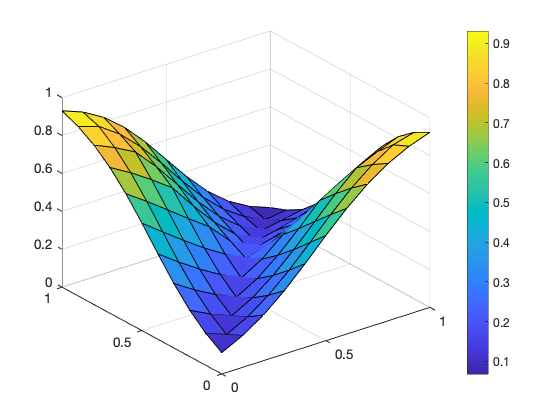

In [138]:
my_xor5 = @(x1, x2)(round(m4(ws,[x1,x2])));
for i=1:4
    fprintf("my_xor5(%d,%d)=%d\n", X(i,1),X(i,2), my_xor5(X(i,1),X(i,2)))
end
a=accuracy(X,Y,my_xor5)
f = @(x1, x2)(m4(ws,[x1,x2]));
[A,B] = meshgrid(0:0.1:1,0:0.1:1);
plot3d(f, A, B, true) 